# Numeričko rješavanje običnih diferencijalnih jednadžbi te odabrani modeli
#### U ovoj Jupyter biljžnici bit će prikazan način rješavanja običnih diferencijalnih jednažbi numeričkim metodama, Eulerovom metodom, Runge Kutta metodom te metodom konačnih diferencija na primjerima modela titranja matematičkog njihala, modela prigušenog gibanja te modela gibanja planeta.
#### Numeričke metode rješavanja običnih diferencijalnih jednadžbi imaju veliki značaj jer svi matematički problemi ne mogu biti rješeni egzaktno, to jest metodama koje se koriste određenim pravilima i logičkom da bismo došli do egzaktnog rješenja. To su zapravo postupci koji se koriste da bi se aproksimirala vrijednost rješenja i time olakšalo rješavanje samog problema.

## Eulerova metoda

Eulerova metoda spada pod numeričke metode za rješavanje diferencijalne jednadžbe prvog reda oblika $$ y' = F(x,y),    y(x_{0}) = y_{0} $$ koje aproksimiraju rješenje na određenim točkama u zadanom intervalu gdje je broj točaka konačan. Navedeni oblik diferencijalne jednadžbe još se naziva inicijalni ili Cauchyjev problem. Aproksimacija se određuje pomoću prvog člana Taylorovog reda:
$ y(x+\Delta{x})\approx y(x) + y'(x)\Delta{x} $ . Za odabrani prirast h definiramo niz točaka $ x_{0},...,x_{n} $ te za svaku točku izračunamo derivaciju funkcije:
 $$ y_{i+1} = y_{i} + h\cdot f(x_{i},y_{i}) $$

### Pseudokod za Eulerovu metodu za jednadžbu prvog reda:
    odrediti x,y koji su početni uvjeti 
    Eulerova metoda (x,y, dy, koraci, početak_intervala, kraj_intervala):
        ponavljaj za n koraka:
            uvećaj x za definirani korak
            uvećaj y za umnožak koraka i vrijednosti diferencijalne 
                jednadžbe za trenutni x i y
            
            spremi nove vrijednosti

### Pseudokod za Eulerovu metodu za jednadžbu drugog reda:
    odrediti x,y koji su početni uvjeti
    početnu diferencijalnu jednadžbu drugog reda pretvoriti u sustav dvije jednadžbe prvog reda dy i dz
    uvedi novu varijablu z i njen početni uvjet
    ponavljaj za n koraka:
        uvećaj x za definirani korak
        uvećaj y za umnožak trenutnog z i koraka
        uvećaj z za umnožak koraka i vrijednosti dz za trenutni y i z
        spremi nove vrijednosti

In [1]:
# x0,y0 - početne vrijednosti
# dy - diferencijalna jednadžba oblika dy/dx = y
# h - broj koraka
# x_pocetni, x_krajnji - zadani interval
def Eulerova_metoda_1 (x, y, dy, h, xf, xi):  # za diferencijalnu jednadžbu prvog reda
    x_list = []
    y_list = []
    x_list.append(x)
    y_list.append(y)
    n = int((xf - xi)/h)
    for i in range(1, n+1):
        y = y + dy(x,y) * h
        y_list.append(y)
        x = x + h
        x_list.append(x)
        
    return x_list,y_list

def Eulerova_metoda_2 (x, y,z, dz, h, xf, xi): # za diferencijalnu jednadžbu drugog reda
    n = int((xf - xi)/h)
    x_list = []
    y_list = []
    z_list = []
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
    for i in range(1, n+1):
        x = x + h
        x_list.append(x)
        y = y + z * h
        y_list.append(y)
        z = z + dz(x,y,z) * h
        z_list.append(z)
    return x_list, y_list, z_list
        

## Runge Kutta metoda
Runge Kutta metoda je numerička metoda za rješavanje diferencijalnih jednadžbi prvog reda, te u uspredbi s Eulerovom metodom posjeduje veću preciznost pri određivanju rješenja. Metoda se primjenjuje na inicijalne probleme oblika $$ y' = F(x,y),    y(x_{0}) = y_{0} $$ Temelji se na ideji određivanja vrijednosti na nekoliko središnjih točaka u zadanome intervalu koje se koriste za izračun krajnjeg rješenja. Runge Kutta metoda objedinjuje više metoda različitih redova ovisno o razini preciznosti.
Za Runge Kutta metodu trećeg reda (RK3) koriste se tri središnje točke sa formulom za aproksimaciju točke: $$ y_{i+1} = y_{i} + \frac{1}{6}\cdot (k_{1} + 4\cdot k_{2} + k_{3})*h $$  gdje su koeficijeni $k_{1}, k_{2} i  k_{3} $ izračunati prema formulama: $$ k_{1} = f(x_{i},y_{i}) $$ $$ k_{2} = f(x_{i} + \frac{h}{2},y_{i} +k_{1} \cdot \frac{h}{2}) $$ $$ k_{3} = f(x_{i} + \frac{h}{2},y_{i}+(-k_{1}+2 \cdot k_{2}) \cdot h) $$ 
Najčešće korištena je metoda četvrtog reda (RK4) što znači da se koriste četiri središnje točke. Formula za aproksimaciju je $$ y_{i+1} = y_{i} + \frac{1}{6} \cdot(k_{1} + 2\cdot k_{2} + 2\cdot k_{3} + k_{4})\cdot h $$  gdje su koeficijeni $k_{1}, k_{2}, k_{3} i k_{4}$ izračunati prema formulama: $$ k_{1} = f(x_{i},y_{i}) $$ $$ k_{2} = f(x_{i} + \frac{h}{2},y_{i} +k_{1} \cdot  \frac{h}{2}) $$ $$ k_{3} = f(x_{i} + \frac{h}{2},y_{i}+k_{2} \cdot \frac{h}{2}) $$ $$ k_{4} = f(x_{i}+h,y_{i}+k_{3} \cdot h) $$ 

### Pseudokod za RK3 za diferencijalnu jednadžbu prvog reda:
    odrediti početne uvjete i interval 
    inicijaliziraj listu x koordinata
    inicijaliziraj listu y koordinata
    def RK3(početni uvjeti, početak_intervala, kraj_interavala, dy, koraci):
        izračunaj k1 
        izračunaj k2 
        izračunaj k3
        uvećaj y za 1/6*(k1+4*k2+k3) pomnožen sa korakom
        uvećaj x za definirani korak
        spremi nove vrijednosti x i y

### Pseudokod za RK3 za diferencijalnu jednadžbu drugog reda:
    odrediti početne uvjete i interval 
    inicijaliziraj listu x koordinata
    inicijaliziraj listu y koordinata
    def RK3(početni uvjeti, početak_intervala, kraj_interavala, dy,dz, koraci):
        izračunaj k1 
        izračunaj k2 
        izračunaj k3
        uvećaj x za definirani korak
        uvećaj y za 1/3*(k1+4*k2+k3) pomnožen sa korakom
        uvećaj z za 
        
        spremi nove vrijednosti x i y

    


### Pseudokod za RK4:
    odrediti početne uvjete i interval 
    inicijaliziraj listu x koordinata
    inicijaliziraj listu y koordinata
    def RK3(početni uvjeti, početak_intervala, kraj_interavala, dy, koraci):
        izračunaj k1 
        izračunaj k2
        izračunaj k3 
        izračunaj k4
        uvećaj y za 1/6*(k1+2*k2+2*k3+k4) pomnožen sa korakom
        uvećaj x za definirani korak
        spremi nove vrijednosti x i y



In [2]:
def RK3(x,y, xf, xi, h, dy):
    x_lista = []
    y_lista = []
    x_lista.append(x)
    y_lista.append(y)
    n = int((xf - xi)/h)
    for i in range (1, n+1):
        k1 = h*dy(x, y)
        k2 = h*dy(x + h/2, y + k1/2)
        k3 = h*dy(x + 3*h/4, y + 3*k2/4)
        y = y + (2*k1 + 3*k2 + 4*k3)/9
        x = x + h
        x_lista.append(x)
        y_lista.append(y)
       
    return x_lista,y_lista

# kod korišten izračun vrijednosti modela u nastavku
def RK3_2_red(x,y,z, xf, xi, h, dz): # za diferencijalnu jednadžbu drugog reda
    x_lista = []
    y_lista = []
    z_lista = []
    x_lista.append(x)
    y_lista.append(y)
    z_lista.append(z)
    n = int((xf - xi)/h)
    for i in range (1, n+1):

        k1 = z*h
        m1 = dz(x,y,z)*h

        k2 = (z+m1/2)*h
        m2 = dz(x+h/2, y+ k1/2, z + m1/2)*h

        k3 = (z - m1 + 2*m2)*h
        m3 = dz(x+h, y-k1 + 2*k2, z - m1+2*m2)*h

        x = x + h
        y = y + (k1 + 4*k2 + k3) * 1/6
        z = z + (m1 + 4*m2 + m3) * 1/6
        x_lista.append(x)
        y_lista.append(y)
        z_lista.append(z)
    return x_lista,y_lista,z_lista




In [3]:
def RK4(x,y, xf, xi, h, dy):
    x_lista = []
    y_lista = []
    x_lista.append(x)
    y_lista.append(y)
    n = int((xf - xi)/h)
    for i in range (1, n+1):
        k1 = h * dy(x, y)
        k2 = h * dy(x + h/2, y + k1/2)
        k3 = h * dy(x + h/2, y + k2/2)
        k4 = h * dy(x + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        x = x + h
        x_lista.append(x)
        y_lista.append(y)
       
    return x_lista,y_lista

# kod korišten izračun vrijednosti modela u nastavku
# Runge Kutta metoda za diferencijalne jednadžbe drugog reda
def RK4_2_red(x, y, z, xf, xi, h, dz):
    x_lista = []
    y_lista = []
    z_lista = []
    x_lista.append(x)
    y_lista.append(y)
    z_lista.append(z)
    n = int((xf - xi)/h)
    for i in range (1, n+1):

        k1 = z*h
        m1 = dz(x,y,z)*h

        k2 = (z+m1/2)*h
        m2 = dz(x+h/2, y+ k1/2, z + m1/2)*h

        k3 = (z + m2/2)*h
        m3 = dz(x+h/2, y+ k2/2, z + m2/2)*h

        k4 = (z + m3)*h
        m4 = dz(x+h, y + k3, z + m3)*h

        x = x + h
        y = y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        z = z + (1/6)*(m1 + 2*m2 + 2*m3 + m4)
        x_lista.append(x)
        y_lista.append(y)
        z_lista.append(z)
    return x_lista,y_lista,z_lista



### Primjer
Na primjeru jednostavne diferencijalne jednadžbe prvog reda usporedit ćemo rezultate prethodno navedene tri numeričke metode. 
jednadžba na kojoj će se provoditi metode je: $$ y' = y - x^2 + 1 $$

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
import numpy as np

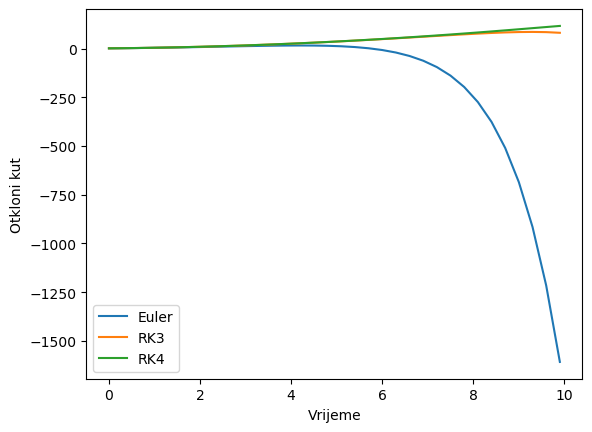

In [5]:
%matplotlib inline
# Definiramo početne uvjete
x0 = 0
y0 = 1
h = 0.3    # korak
t0 = 0.0   # vremenski interval
tmax = 10.0

# Definiramo funkciju iz diferencijalne jednadžbe
def fj(x0, y0):
    return y0 - x0**2 + 1

# Funkcija koja izračunala egzaktno rješenje
def y_analytic(x, C):
    C = 1
    return 1 - x**2/2 + C*np.exp(-x)

# Kreiraju se dvije liste, sa x i y vrijednostima -> Eulerova metoda
tocke_eulr = Eulerova_metoda_1 (x0, y0, fj, h, tmax, t0)

# Kreiraju se dvije liste, sa x i y vrijednostima -> RK3 metoda
tocke_rk3 = RK3(x0, y0,tmax, t0,  h, fj )

# Kreiraju se dvije liste, sa x i y vrijednostima -> RK4 metoda
tocke_rk4 = RK4(x0, y0,tmax, t0,  h, fj )


# Iscrtavamo graf na temelju prethodno generiranih listi
plt.plot(tocke_eulr[0], tocke_eulr[1]
         ,tocke_rk3[0], tocke_rk3[1]
         ,tocke_rk4[0], tocke_rk4[1])
plt.xlabel('Vrijeme')
plt.ylabel('Otkloni kut')
plt.legend(['Euler', 'RK3', 'RK4'])
plt.show()

# Model titranja matematičkog njihala

Matematičko njihalo je primjer harmonijskog titranja, to je sustav koji se sastoji od tijela mase m obješenog na nerastezljivoj niti duljine l zanemarive mase. Tijelo se otklanja iz ravnotežnog položaja za neki početni kut i počinje se periodično gibati oko ravnotežnog položaja prema drugom Newtonovom zakonu i zakonu o očuvanju energije. Gibanje se može opisati kutom otklona njihala, to jest kutom koji čini nit sa vertikalom kada je u otklonjenom položaju. Kut otklona se mijenja kako se točkasta masa giba, a period gibanja ovisi o duljini niti i akceleraciji sile teže. Na matematičko njihalo mogu utjecati mnogi vanjski uvjeti poput otpora zraka i trenja, no mi ćemo promatrati idealan slučaj jednostavnog harmonijskoj oscilatora u kojem se tijelo stalno giba i uspinje se uvijek do iste visine.
Diferencijalna jednadžba koja opisuje takvo gibanje je: $$ d^2(\theta)/dt^2 + (\frac{g}{L})sin(\theta) = 0 $$ gdje je $\theta$ kut oklona, t je vrijeme, g je akceleracija sile teže i l je duljina niti.


In [6]:
# Definiraj početne uvjete
g = 9.81  # akceleracija sile teže
L = 1   # duljina niti
theta0 = np.pi/6  # kut otklona
omega0 = 0  # početna brzina
h = 0.01  # korak
t0 = 0.0 #početak intervala
tmax = 10.0  # kraj intervala


Budući da se Eulerova metoda primjenjuje na diferencijalne jednadžbe prvog reda, a diferencijalna jednadžba matematičkog njihala je drugog reda, moram ju raspisati u sustav dvije jednadžbe prvog reda gdje je derivacija derivacija kuta otklona jednaka kutnog brzini mase objekta, a derivacija kutne brzine objekta jednaka akceleraciji objekta: $$ \frac{d^2\theta}{dt^2} = \omega$$ $$ \frac{d^2\omega}{dt^2} = -\frac{g}{L} \cdot sin(\theta) $$


In [7]:
# Funkcija za diferencijalnu jednadžbu
def mat_njihalo_sustav(t,theta, omega):
    dtheta_dt = omega
    domega_dt = -g/L * np.sin(theta)
    return domega_dt

In [8]:
# Egzaktno rješenje za usporedbu
def egz_e_m1(t0, tmax, h, g, L, theta0):
    ta = np.arange(t0, tmax+h, h)
    theta_a = theta0 * np.cos(np.sqrt(g/L) * ta)    
    return ta, theta_a


### Rješenje dobiveno Eulerovom metodom


In [9]:
# Eulerova metoda

def eulr_m1(t0,theta0, omega0, mat_njihalo_sustav, h, tmax):
    liste = Eulerova_metoda_2(t0,theta0, omega0, mat_njihalo_sustav, h, tmax, t0)
    t_lista_E = liste[0]
    theta_lista_E = liste[1]
    omega_lista_E = liste[2]
    ta  = egz_e_m1(t0, tmax, h , g, L, theta0)
    plt.plot(t_lista_E, theta_lista_E, ta[0], ta[1])
    plt.xlabel('Vrijeme')
    plt.ylabel('Otkloni kut')
    plt.legend(['Euler', 'egzaktno'])
    plt.show()



Rješenje dobiveno Eulerovom metodom nije precizno kao rješenje dobiveno drugom metodama jer je to metoda prvog reda te nije pogodna za velike vrijednosti intevala i koraka.

### Rješenje dobiveno Runge Kutte metodom trećeg reda
Budući da nailazimo na isti problem diferencijalne jednadžbe drugog reda, koristit ćemo se istim sustavom jednadžbi prvog reda u rješavanju.
Kod zadavanja početnih uvjeta, bitno je znati da će manji koraci davati preciznija rješenja, ali s većim ukupnim vremenom izračunavanja. 

In [10]:
#Runge Kutta metoda trećeg reda za diferencijalne jednadžbe drugog reda
def RK3_e(theta0,omega0, t0, tmax, h, mat_njihalo_sustav):
    liste = RK3_2_red(t0, theta0,omega0, tmax, t0, h, mat_njihalo_sustav)
    t_lista_RK3 = liste[0]
    theta_lista_RK3 = liste[1]
    
    # Kod za generiranje grafa
    ta  = egz_e_m1(t0, tmax, h , g, L, theta0)
    plt.plot(t_lista_RK3, theta_lista_RK3,ta[0], ta[1])
    plt.xlabel('Vrijeme')
    plt.ylabel('Kut otklona')
    plt.legend(['RK3', 'egzaktno'])
    plt.show()



### Rješenje dobiveno Runge Kutta metodom četvrtog reda
Runge Kutta metoda četvrtog reda je najkorištenija zbog svoje velike preciznosti u usporedbi sa drugim metodama jer daje bolje aproksimacije u svakoj iteraciji algoritma.

In [11]:
# Runge Kutta metoda četvrtog reda za diferencijalne jednadžbe drugog reda
def rk4_2(t0, theta0,omega0, tmax,h, mat_njihalo_sustav):
    liste = RK4_2_red(t0, theta0,omega0, tmax, t0, h, mat_njihalo_sustav)
    t_lista_RK4 = liste[0]
    theta_lista_RK4 = liste[1]
    
    # Kod za generiranje grafa
    ta  = egz_e_m1(t0, tmax, h , g, L, theta0)
    plt.plot(t_lista_RK4, theta_lista_RK4,ta[0], ta[1])
    plt.xlabel('Vrijeme')
    plt.ylabel('Kut otklona')
    plt.legend(['RK4','egzaktno' ])
    plt.show()



In [12]:
%matplotlib inline
from ipywidgets import interactive

def f(metoda,h, tmax,theta):
    if metoda == "Eulerova metoda":
        theta0 = np.pi*theta
        eulr_m1(t0,theta0, omega0, mat_njihalo_sustav, h, tmax)
    if metoda == "RK3":
        theta0 = np.pi*theta
        RK3_e(theta0,omega0, t0, tmax, h, mat_njihalo_sustav)
    if metoda == "RK4":
        theta0 = np.pi*theta
        rk4_2(t0, theta0,omega0, tmax,h, mat_njihalo_sustav)

interactive_plot = interactive(f, metoda =(["Eulerova metoda", "RK3", "RK4"]), h=(0.1,1.0), tmax=(0.0, 20.0), theta = ([1/2, 1/3, 1/4, 1/6]))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot
    


interactive(children=(Dropdown(description='metoda', options=('Eulerova metoda', 'RK3', 'RK4'), value='Eulerov…

### Kviz tema: Model matematičkog njihala

In [13]:
{
    "tags": [
        "remove-cell"
    ]
}
%matplotlib inline
from jupyterquiz import display_quiz

quiz = [{
        "question": "Koja od ponuđenih diferencijalnih  jednadžbi opisuje model matematičkog njihala?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "<span style='color: black;'>""y'' + g/l sin(y) = 0""</span>",
                "correct": True,
                "feedback": "Točno!"
            },
            {
                "answer": "<span style='color: black;'>""y' + g/l cos(y) = 0""</span>",
                "correct": False,
                "feedback": "Jednadžba modela je diferencijalna jednadžba drugog reda."
            },
            {
                "answer": "<span style='color: black;'>""y'' + g/l cos(y) = 0""</span>",
                "correct": False,
                "feedback": "Gibanje modela je sinusoidno."
            },
            {
                "answer": "<span style='color: black;'>""y'' + g/l cos(y) = 0""</span>",
                "correct": False,
                "feedback": "Potrebna konstanta je akceleracija sile teže."
            }
        ]
    }]


display_quiz(quiz)

quiz2 = [{
        "question": "Kako odabir početnih uvjeta utječe na rješenje dobiveno Runge Kutta metodom?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "<span style='color: black;'>""Početni uvjeti nemaju utjecaja na rješenje dobiveno Runge Kutta metodom.""</span>",
                "correct": False,
                "feedback": "Kako bi rješenje bilo što točnije, potrebo je imati što preciznije početne uvjete."
            },
            {
                "answer": "<span style='color: black;'>""Početni uvjeti određuju početno stanje njihala i njegovo gibanje""</span>",
                "correct": True,
                "feedback": "Točno!."
            },
            {
                "answer": "<span style='color: black;'>""Početni uvjeti utječu samo na preciznost rješenja u prvom koraku iteracije.""</span>",
                "correct": False,
                "feedback": "O početnim uvjetima ovisi preciznost izračuna kod svake iteracije."
            },
            {
                "answer": "<span style='color: black;'>""Točnost početnih uvjeta ne utječe na konačno rješenje.""</span>",
                "correct": False,
                "feedback": "Kako bi rješenje bilo što točnije, potrebo je imati što preciznije početne uvjete."
            }
        ]
    }]


display_quiz(quiz2)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Animacija: model matematičkog njihala koristeći RK4 metodu


<IPython.core.display.Javascript object>


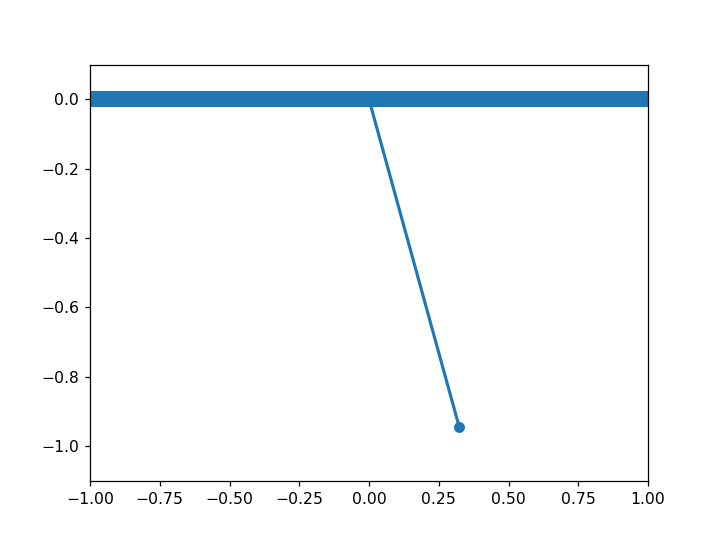

In [14]:
%matplotlib notebook
# Definiraj početne uvjete
g = 9.81  # akceleracija sile teže
L = 1   # duljina niti
theta0 = np.pi/6  # kut otklona
omega0 = 0  # početna brzina
h = 0.01  # korak
t0 = 0.0 #početak intervala
tmax = 10.0  # kraj intervala

liste = RK4_2_red(t0, theta0,omega0, tmax, t0, h, mat_njihalo_sustav)
t_lista_RK4 = liste[0]
theta_lista_RK4 = liste[1]
theta = theta_lista_RK4
fig, ax = plt.subplots()

line, = ax.plot([], [], 'o-', lw=2)

def animate(i):
    x = [0, L*np.sin(theta[i])]
    y = [0, -L*np.cos(theta[i])]
    ax.axhline(0.0, linewidth=10)
    line.set_data(x, y)
    return line,

ax.set_xlim(-L, L)
ax.set_ylim(-1.1*L, 0.1*L)
ani = FuncAnimation(fig, animate, frames=len(theta), interval=50, blit=True)

plt.show()


## Model prigušenog titranja
Prigušeno tiranje nastaje kada na sistem utječe vanjska sila. Model prigušenog tiranja može se matematički opisati jednadžbom: $$m  \frac{d^2x}{dt^2} + b  \frac{dx}{dt} + kx = 0 $$ gdje je m masa objekta na opruzi, k je konstnta opruge, x je amplituda objekta, r je koeficijent trenja. Rješenje jednadžbe je eksponencijalna funkcija envelopa koja opisuje gibanje objekta u vremenu t. U prethodnom primjeru amplituda je bila stalna, no u ovom modelu amplituda će se s vremenom smanjivati ovisno o stupnju prigušenja. Gibanje harmonijskog oscilatora može postati i aperiodično kada je gušenje sustava toliko veliko da se titranje zaustavlja unutar prvog perioda gibanja.

In [15]:
# Početni parametri
m = 1.0   # masa tijela na opruzi
k = 1.0   # konstanta opruge
h = 0.8     
t0 = 0.0
tmax = 20.0
x0 = 2.0
v0 = 0.0
b = 0.4

In [16]:
# Egzaktno rješenje za usporedbu
def graf_egz_m2(x0, v0, b, k, m, tmax,h):
    ta = np.arange(t0, tmax+h, h)
    x = x0*np.exp(- b/(2*m)*ta)*np.cos(np.sqrt(k/m)*ta) + (v0 + x0* b/(2*m))*np.exp(- b/(2*m)*ta)*np.sin(np.sqrt(k/m)*ta)/np.sqrt(k/m)
    return ta,x
    

### Rješenje dobiveno Eulerovom metodom
Za Eulerovu metodu potrebno je pretvoriti početnu dijeferencijalnu jednadžbu drugog reda u sustav diferencijalnih jednadžbi prvog reda.

In [17]:
# definirali smo funkciju za diferencijalnu jednadžbu
def opruga_sustav(t,x0, v0 ):
    dx0 = v0
    dv0 = (-b/m)*v0 - (k/m)*x0
    return dv0

In [18]:

def graf_eulr_m2(x0, v0, opruga_sustav, h, tmax, t0,tae, xe):
    liste = Eulerova_metoda_2(t0,x0, v0, opruga_sustav, h, tmax, t0)
    t2_lista_E = liste[0]
    x0_lista_E = liste[1]
    plt.plot(t2_lista_E, x0_lista_E, tae, xe)
    plt.xlabel('Vrijeme')
    plt.ylabel('Amplituda')
    plt.legend(['Euler','egzaktno'])
    plt.show()


### Rješenje dobiveno Runge Kutta metodom trećeg reda


In [19]:

def graf_rk3_m2(t0, x0, v0, tmax, h, opruga_sustav, tae, xe):
    liste = RK3_2_red(t0,x0, v0, tmax, t0, h, opruga_sustav)
    t2_lista_RK3 = liste[0]
    x0_lista_RK3 = liste[1]
    # graf
    plt.plot(t2_lista_RK3, x0_lista_RK3, tae, xe)
    plt.xlabel('Vrijeme')
    plt.ylabel('Amplituda')
    plt.legend(['RK3','egzaktno'])
    plt.show()


### Rješenje dobiveno Runge Kutta metodom četvrtog reda

In [20]:

def graf_rk4_m2(t0, x0, v0, tmax, h, opruga_sustav, tae, xe):
    liste = RK4_2_red(t0,x0, v0, tmax, t0, h, opruga_sustav)
    t2_lista_RK4 = liste[0]
    x0_lista_RK4 = liste[1]
    # graf
    plt.plot(t2_lista_RK4, x0_lista_RK4, tae, xe )
    plt.xlabel('Vrijeme')
    plt.ylabel('Amplituda')
    plt.legend(['RK4', 'egzaktno'])
    plt.show()

### GRAFOVI

In [21]:
%matplotlib inline
from ipywidgets import interactive

def f(metoda,h, tmax):
    vr  = graf_egz_m2(x0, v0, b, k, m, tmax,h)
    if metoda == "Eulerova metoda":
    
        graf_eulr_m2(x0, v0, opruga_sustav, h, tmax, t0, vr[0], vr[1])
    if metoda == "RK3":
        
        graf_rk3_m2(t0,x0, v0, tmax, h, opruga_sustav, vr[0], vr[1])
    if metoda == "RK4":
        
        graf_rk4_m2(t0,x0, v0, tmax, h, opruga_sustav, vr[0], vr[1])

interactive_plot = interactive(f, metoda =(["Eulerova metoda", "RK3", "RK4"]), h=(0.1,1.0), tmax=(0.0, 20.0))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot


interactive(children=(Dropdown(description='metoda', options=('Eulerova metoda', 'RK3', 'RK4'), value='Eulerov…

### Kviz tema: Model prigušenog gibanja

In [22]:
from jupyterquiz import display_quiz

quiz = [{
        "question": "Koja od ponuđenih diferencijalnih jednadžbi opisuje model prigušenog gibanja?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "<span style='color: black;'>""m(d^2x/dt^2) +  b*(dx/dt) = 0""</span>",
                "correct": True,
                "feedback": "Točno!"
            },
            {
                "answer": "<span style='color: black;'>""m(d^2x/dt^2) + bx + kx = F(t)""</span>",
                "correct": False,
                "feedback": "F(t) označava vanjsku silu koja se ne proučava u ovome modelu i uz koeficijent b trebalo bi se nalaziti (dx/dt)."
            },
            {
                "answer": "<span style='color: black;'>""m(d^2x/dt^2) + kx = F(t)""</span>",
                "correct": False,
                "feedback": "F(t) označava vanjsku silu koja se ne proučava u ovome modelu i nedostaje član b*(dx/dt)."
            },
            {
                "answer": "<span style='color: black;'>""y'' + g/l sin(y) = 0""</span>",
                "correct": False,
                "feedback": "To je jednadžba modela matematičkog njihala."
            }
        ]
    }]


display_quiz(quiz)

question = "Koji je cilj Eulerove metode?"
options = [
           "Pronaći točno rješenje diferencijalne jednadžbe.",
           "Prnoaći vrijednost promjene varijable.",
           "Pronaći aproksimativon rješenje diferencijalne jednadžbe."]
correct_answer = "Pronaći aproksimativon rješenje diferencijalne jednadžbe"

quiz2 = [{
        "question": "Kako odabir početnih uvjeta utječe na rješenje dobiveno Runge Kutta metodom?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "<span style='color: black;'>""Početni uvjeti nemaju utjecaja na rješenje dobiveno Runge Kutta metodom.""</span>",
                "correct": False,
                "feedback": "Kako bi rješenje bilo što točnije, potrebo je imati što preciznije početne uvjete."
            },
            {
                "answer": "<span style='color: black;'>""Početni uvjeti određuju početno stanje njihala i njegovo gibanje""</span>",
                "correct": True,
                "feedback": "Točno!."
            },
            {
                "answer": "<span style='color: black;'>""Početni uvjeti utječu samo na preciznost rješenja u prvom koraku iteracije.""</span>",
                "correct": False,
                "feedback": "O početnim uvjetima ovisi preciznost izračuna kod svake iteracije."
            },
            {
                "answer": "<span style='color: black;'>""Točnost početnih uvjeta ne utječe na konačno rješenje.""</span>",
                "correct": False,
                "feedback": "Kako bi rješenje bilo što točnije, potrebo je imati što preciznije početne uvjete."
            }
        ]
    }]


display_quiz(quiz2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Animacija: model prigušenog gibanja

<IPython.core.display.Javascript object>


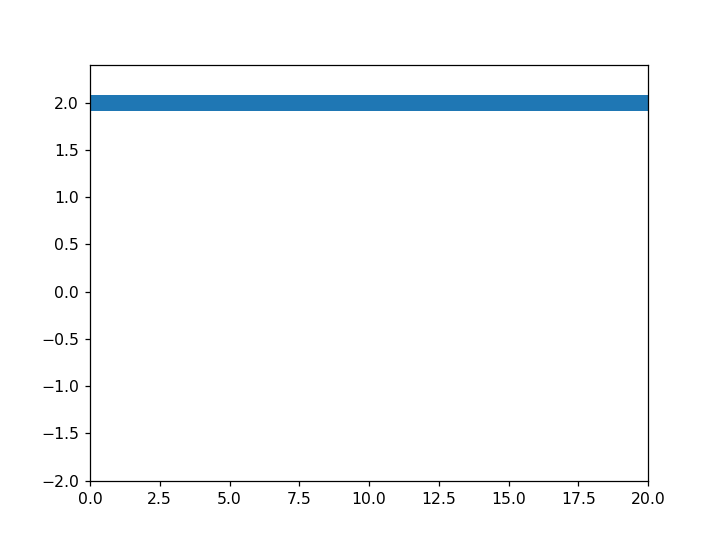

In [23]:


%matplotlib notebook
liste = RK4_2_red(t0,x0, v0, tmax, t0, h, opruga_sustav)
t2_lista_RK4 = liste[0]
x0_lista_RK4 = liste[1]

fig, ax = plt.subplots()

line, = ax.plot([], [], 'o-', lw=2)

def animate(i):
    x = [tmax/2,tmax/2]
    y = [2,x0_lista_RK4[i]]
    ax.axhline(2.0, linewidth=10)
    line.set_data(x, y)
    return line,

ax.set_xlim(0, tmax)
ax.set_ylim(-x0, x0*1.2)
ani = FuncAnimation(fig, animate, frames=len(theta), interval=50, blit=True)

plt.show()

# Model gibanja planeta
Gibanje planeta oko Sunca može se opisati diferencijalnom jednadžbom drugog reda: $$m\frac{d^2r}{dt^2} = -G\cdot M\cdot m\cdot \frac{r}{|r|^3}$$ gdje je m masa planeta, r/|r| je jedinični vektor vektora r koji povezuje središta masa planeta i Sunca, G je gravitacijska konstanta, a M je masa Sunca.
Ova jednadžba govori da je akceleracija planeta proporcionalna gravitacijskoj sili između planeta i Sunca, i obrnuto proprocionalna kvadratu udaljenosti između njih. To je zapravo Newtonow zakon gibanja planeta oko Sunca pod utjecajem gravitacije, a mi ćemo promatrati sve planete Sunčevog sustava.

In [24]:
# Početni uvjeti 
M = 1.989e30   # masa Sunca u kg
G = 6.674e-11  # gravitacijska konstanta
h = 3600       # korak u s
t0 = 0
tmax = 365 * 24* 3600       # vremenski interval podijeljen je u sekunde

Sustav je raspisan u više jednadžbi prvog reda jer se gibanje planeta opisuje sa više parametara nego u prijašnjim modelima. Gibanje se opisuje pomoću dva vektora, to jest pozicjskim vektorom koji opisuje gdje se planet nalazi i vektorom brzine koji opisuje kojom se brzinom mijenja pozicija planeta. Navedene vrijednosti ne mogu se razdvojiti u nezavisne jednadžbe te se sustav koji smo imali do sada za prijašnje modele mijenja.

In [25]:
# definirati funkciju za diferencijalnu jednadžbu
def gibanje_planeta_sustav(t,rx0, ry0, vx0, vy0):
    drdx = vx0
    drdy = vy0
    dvx0dt = -(G*M*rx0) / (rx0**2 + ry0**2)**(3/2)
    dvy0dt = -(G*M*ry0) / (rx0**2 + ry0**2)**(3/2)
    return t,drdx, drdy, dvx0dt, dvy0dt

### Rješenje dobiveno Eulerovom metodom


Zbog početnih uvjeta pozicije i brzine koji imaju x i y koordinate, morat ćemo modificirati funkciju za Eulerovu metodu koju smo koristili do sada kako bi mogla primiti više parametara.

In [26]:

def Eulerova_metoda_3 (t, rx0, ry0, vx0, vy0, fj, h, xf, xi): # za diferencijalnu jednadžbu drugog reda
    n = int((xf - xi)/h)
    t_list = []
    rx0_list = []
    ry0_list = []
    vx0_list = []
    vy0_list = []
    t_list.append(t)
    rx0_list.append(rx0)
    ry0_list.append(ry0)
    vx0_list.append(vx0)
    vy0_list.append(vy0)
    for i in range(1, n+1):
        t = t + h
        t_list.append(t)
        rx0 = rx0 + h*fj(t,rx0, ry0, vx0, vy0)[1]
        rx0_list.append(rx0)

        ry0 = ry0 + h*fj(t,rx0, ry0, vx0, vy0)[2]
        ry0_list.append(ry0)

        vx0 = vx0 + h*fj(t,rx0, ry0, vx0, vy0)[3]
        vx0_list.append(vx0)

        vy0 = vy0 + h*fj(t,rx0, ry0, vx0, vy0)[4]
        vy0_list.append(vy0)
        
    return t_list,rx0_list,ry0_list,vx0_list,vy0_list

In [27]:

def eulr_m3_lin(rx0, ry0, vx0, vy0, gibanje_planeta_sustav, h, tmax, t0):
        liste = Eulerova_metoda_3(t0, rx0, ry0, vx0, vy0, gibanje_planeta_sustav, h, tmax, t0)
        rx0_lista_E = liste[1]
        ry0_lista_E = liste[2]
        return rx0_lista_E,ry0_lista_E

def eurl_m3(tmax,h):
    
    Mercury = eulr_m3_lin(5.791e10, 0, 0, 4.787e4, gibanje_planeta_sustav, h, tmax, t0)
    Venus = eulr_m3_lin(1.082e11, 0, 0, 3.502e4, gibanje_planeta_sustav, h, tmax, t0)
    Earth = eulr_m3_lin(1.496e11, 0, 0, 2.978e4, gibanje_planeta_sustav, h, tmax, t0)
    Mars = eulr_m3_lin(2.279e11, 0, 0, 2.408e4, gibanje_planeta_sustav, h, tmax, t0)
    Jupiter = eulr_m3_lin(7.785e11, 0, 0, 1.307e4, gibanje_planeta_sustav, h, tmax, t0)
    Saturn = eulr_m3_lin(1.43e12, 0, 0, 9.69e3, gibanje_planeta_sustav, h, tmax, t0)
    Uranus = eulr_m3_lin(2.87e12, 0, 0,6.81e3, gibanje_planeta_sustav, h, tmax, t0)
    Neputne = eulr_m3_lin(4.5e12, 0, 0, 5.43e3, gibanje_planeta_sustav, h, tmax, t0)

    plt.plot(Mercury[0], Mercury[1], Venus[0], Venus[1],Earth[0], Earth[1], Mars[0],Mars[1], Jupiter[0], Jupiter[1], Neputne[0], Neputne[1], Uranus[0], Uranus[1], Saturn[0], Saturn[1])
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Gibanje planeta oko Sunca')
    plt.scatter(0, 0, s=100, c='yellow')  #Sunce
    plt.show()

### Rješenje dobiveno Runge Kutta metodom trećeg reda

In [28]:
# Definirana funkcija za diferencijalnu jednadžbu
def gibanje_planeta_sustav2(t, r):
    rx, ry, vx, vy = r
    drdt = [vx, vy, -(G*M*rx) / (rx**2 + ry**2)**(3/2), -(G*M*ry) / (rx**2 + ry**2)**(3/2)]
    return np.array(drdt)

In [29]:
# Runge-Kutta metoda
def RK3_2_red_gp(t, r, fj, h, xf, xi):
    n = int((xf - xi)/h)
    t_list = []
    r_list = []
    t_list.append(t)
    r_list.append(r)
    
    for i in range(1, n+1):
        
        k1 = h*fj(t, r)
        k2 = h*fj(t + h/2, r + k1/2)
        k3 = h*fj(t + h, r - k1 + 2*k2)

        r = r + (k1 + 4*k2 + k3)/6
        r_list.append(r)

        t = t + h 
        t_list.append(t)

    return np.array(t_list), np.array(r_list)

In [30]:
def rk3_m3_za_linije(rx0, ry0, vx0, vy0, gibanje_planeta_sustav2, h, tmax, t0):
    r0 = np.array([rx0, ry0, vx0, vy0])
    t, r = RK3_2_red_gp(t0, r0, gibanje_planeta_sustav2, h, tmax, t0)
    rx = r[:, 0]
    ry = r[:, 1]
    return rx, ry
def rk3_m3(tmax,h):
    Mercury = rk3_m3_za_linije(5.791e10, 0, 0, 4.787e4, gibanje_planeta_sustav2, h, tmax, t0)
    Venus = rk3_m3_za_linije(1.082e11, 0, 0, 3.502e4, gibanje_planeta_sustav2, h, tmax, t0)
    Earth = rk3_m3_za_linije(1.496e11, 0, 0, 2.978e4, gibanje_planeta_sustav2, h, tmax, t0)
    Mars = rk3_m3_za_linije(2.279e11, 0, 0, 2.408e4, gibanje_planeta_sustav2, h, tmax, t0)
    Jupiter = rk3_m3_za_linije(7.785e11, 0, 0, 1.307e4, gibanje_planeta_sustav2, h, tmax, t0)
    Saturn = rk3_m3_za_linije(1.43e12, 0, 0, 9.69e3, gibanje_planeta_sustav2, h, tmax, t0)
    Uranus = rk3_m3_za_linije(2.87e12, 0, 0,6.81e3, gibanje_planeta_sustav2, h, tmax, t0)
    Neputne = rk3_m3_za_linije(4.5e12, 0, 0, 5.43e3, gibanje_planeta_sustav2, h, tmax, t0)

    plt.plot(Mercury[0], Mercury[1], Venus[0], Venus[1],Earth[0], Earth[1], Mars[0],Mars[1], Jupiter[0], Jupiter[1], Neputne[0], Neputne[1], Uranus[0], Uranus[1], Saturn[0], Saturn[1])
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Gibanje planeta oko Sunca')
    plt.scatter(0, 0, s=100, c='yellow')  #Sunce
    plt.show()

### Rješenje dobiveno Runge Kutta metodom četvrtog reda
Kao i kod Eulerove metode korištene za ovaj model, moram ćemo prilagoditi i Runge Kutta metodu da bismo mogli riješiti diferencijalnu jednadžbu.


In [31]:
# Runge-Kutta metoda
def RK4_2_red_gp(t, r, fj, h, xf, xi):
    n = int((xf - xi)/h)
    t_list = []
    r_list = []
    t_list.append(t)
    r_list.append(r)
    
    for i in range(1, n+1):
        
        k1 = h*fj(t, r)
        k2 = h*fj(t + h/2, r + k1/2)
        k3 = h*fj(t + h/2, r + k2/2)
        k4 = h*fj(t + h, r + k3)

        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
        r_list.append(r)

        t = t + h 
        t_list.append(t)

    return np.array(t_list), np.array(r_list)

In [32]:

def rk4_m3_za_linije(rx0, ry0, vx0, vy0, gibanje_planeta_sustav2, h, tmax, t0):
    r0 = np.array([rx0, ry0, vx0, vy0])
    t, r = RK4_2_red_gp(t0, r0, gibanje_planeta_sustav2, h, tmax, t0)
    rx = r[:, 0]
    ry = r[:, 1]
    return rx, ry
def rk4_m3(tmax,h):
    Mercury = rk4_m3_za_linije(5.791e10, 0, 0, 4.787e4, gibanje_planeta_sustav2, h, tmax, t0)
    Venus = rk4_m3_za_linije(1.082e11, 0, 0, 3.502e4, gibanje_planeta_sustav2, h, tmax, t0)
    Earth = rk4_m3_za_linije(1.496e11, 0, 0, 2.978e4, gibanje_planeta_sustav2, h, tmax, t0)
    Mars = rk4_m3_za_linije(2.279e11, 0, 0, 2.408e4, gibanje_planeta_sustav2, h, tmax, t0)
    Jupiter = rk4_m3_za_linije(7.785e11, 0, 0, 1.307e4, gibanje_planeta_sustav2, h, tmax, t0)
    Saturn = rk4_m3_za_linije(1.43e12, 0, 0, 9.69e3, gibanje_planeta_sustav2, h, tmax, t0)
    Uranus = rk4_m3_za_linije(2.87e12, 0, 0,6.81e3, gibanje_planeta_sustav2, h, tmax, t0)
    Neputne = rk4_m3_za_linije(4.5e12, 0, 0, 5.43e3, gibanje_planeta_sustav2, h, tmax, t0)

    plt.plot(Mercury[0], Mercury[1], Venus[0], Venus[1],Earth[0], Earth[1], Mars[0],Mars[1], Jupiter[0], Jupiter[1], Neputne[0], Neputne[1], Uranus[0], Uranus[1], Saturn[0], Saturn[1])
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Gibanje planeta oko Sunca')
    plt.scatter(0, 0, s=100, c='yellow')  #Sunce
    plt.show()

### GRAFOVI


In [33]:
%matplotlib inline
from ipywidgets import interactive

def f(metoda,tmax,h):
   
    if metoda == "Eulerova metoda":
        
        eurl_m3(tmax,h)
    if metoda == "RK3":
        
        rk3_m3(tmax,h)
    if metoda == "RK4":
        
        rk4_m3(tmax,h)

interactive_plot = interactive(f, metoda =(["Eulerova metoda", "RK3", "RK4"]),  
                               h = ([3600, 3600*2, 3600*3, 3600*4, 3600*5, 3600*6]),
                               tmax=([365 * 24* 3600,365 * 24* 3600 *2,365 * 24* 3600 *3,365 * 24* 3600 *4,365 * 24* 3600 *5]),)
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot
    

interactive(children=(Dropdown(description='metoda', options=('Eulerova metoda', 'RK3', 'RK4'), value='Eulerov…

### Kviz tema: Model gibanja planeta

In [34]:
# @hidden_cell
from jupyterquiz import display_quiz

quiz = [{
        "question": "Koja od obrađenih metoda je najbolja za rješavanje diferencijalne jednadžbe gibanja planeta?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "<span style='color: black;'>""Eulerova metoda""</span>",
                "correct": False,
                "feedback": "Eulerova metoda koristi diferencijalnu formulu prvog reda, lako ju je za implementirati, ali ima malu preciznost u izračunu."
            },
            {
                "answer": "<span style='color: black;'>""Metoda konačnih diferencija""</span>",
                "correct": False,
                "feedback": "Koristi se za parcijalne diferencijalne jednadžbe."
            },
            {
                "answer": "<span style='color: black;'>""Runge Kutta metoda četvrtog reda""</span>",
                "correct": True,
                "feedback": "Točno!"
            },
            {
                "answer": "<span style='color: black;'>""Runge Kutta metoda trećeg reda""</span>",
                "correct": False,
                "feedback": "Runge Kutta metode su metode višeg reda što granatira veću preciznost, ali zato su računalno skuplje. "
            }
        ]
    }]


display_quiz(quiz)



quiz2 = [{
        "question": "Koja je uloga gravitacijske konstante G u jednadžbi modela?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "<span style='color: black;'>""Određuje brzinu planeta.""</span>",
                "correct": False,
                "feedback": "Brzina planeta je izražena u vektoru v."
            },
            {
                "answer": "<span style='color: black;'>""Određuje masu planeta.""</span>",
                "correct": False,
                "feedback": "Oznaka m je masa planeta."
            },
            {
                "answer": "<span style='color: black;'>""Određuje jačinu privlačenja gravitacijske sile između planeta.""</span>",
                "correct": True,
                "feedback": "Točno!"
            },
            {
                "answer": "<span style='color: black;'>""Određuje udaljenost planeta od Sunca.""</span>",
                "correct": False,
                "feedback": "Oznakom r je označena udaljenost planeta od Sunca."
            }
        ]
    }]


display_quiz(quiz2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Animacija: model gibanja planeta

<IPython.core.display.Javascript object>


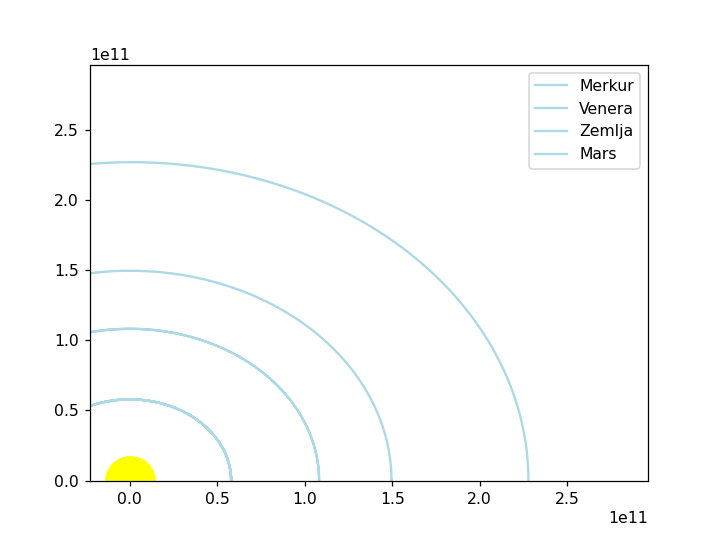

In [35]:
%matplotlib notebook
from matplotlib.patches import Patch
fig, ax = plt.subplots()

Earth = rk4_m3_za_linije(1.496e11, 0, 0, 2.978e4, gibanje_planeta_sustav2, h, tmax, t0)
Earthx = Earth[0]
Earthy = Earth[1]

Venus = rk4_m3_za_linije(1.082e11, 0, 0, 3.502e4, gibanje_planeta_sustav2, h, tmax, t0)
Venusx = Venus[0]
Venusy = Venus[1]

Mercury = rk4_m3_za_linije(5.791e10, 0, 0, 4.787e4, gibanje_planeta_sustav2, h, tmax, t0)
Mercuryx = Mercury[0]
Mercuryy = Mercury[1]

Mars = rk4_m3_za_linije(2.279e11, 0, 0, 2.408e4, gibanje_planeta_sustav2, h, tmax, t0)
Marsx = Mars[0]
Marsy = Mars[1]
plt.plot(Mercury[0], Mercury[1], Venus[0], Venus[1],Earth[0], Earth[1], Mars[0],Mars[1], color = 'lightblue', markersize=0.2)

line_earth, = ax.plot([], [], 'co', markersize=1.5)
dot_earth, = ax.plot([], [], 'o', color='steelblue', markersize=20)
line_venus, = ax.plot([], [], 'co', markersize=1.5)
dot_venus, = ax.plot([], [], 'o', color='goldenrod', markersize=18)
line_mercury, = ax.plot([], [], 'co', markersize=1.5)
dot_mercury, = ax.plot([], [],'o', color='darkorange', markersize=8)
line_mars, = ax.plot([], [], 'co', markersize=1.5)
dot_mars, = ax.plot([], [],'o', color='indianred', markersize=10)

plt.scatter(0, 0, s=1000, c='yellow')  


legend_handles = [
    
    Patch(color='yellow', label='Patch'),
    Patch(color='darkorange', label='Patch'),
    Patch(color='goldenrod', label='Patch'),
    Patch(color='steelblue', label='Patch'),
    Patch(color='indianred', label='Patch'),
]
legend_labels = ['Sunce','Merkur', 'Venera', 'Zemlja', 'Mars']


legend = ax.legend(legend_handles, legend_labels)

def animate(i):
    legend = ax.legend(legend_handles, legend_labels)
    
    dot_earth.set_data(Earthx[i], Earthy[i])
    line_earth.set_data(Earthx[:i], Earthy[:i])
    dot_venus.set_data(Venusx[i], Venusy[i])
    line_venus.set_data(Venusx[:i], Venusy[:i])
    dot_mercury.set_data(Mercuryx[i], Mercuryy[i])
    line_mercury.set_data(Mercuryx[:i], Mercuryy[:i])
    dot_mars.set_data(Marsx[i], Marsy[i])
    line_mars.set_data(Marsx[:i], Marsy[:i])
    return line_earth, dot_earth, line_venus, dot_venus, line_mercury, dot_mercury, line_mars, dot_mars


ax.set_xlim(-2.279e10, 2.279e11 + 0.3 * 2.279e11)
ax.set_ylim(-1000 ,2.279e11 + 0.3 * 2.279e11)
ani = FuncAnimation(fig, animate, frames=len(Earthx), interval=6, blit=True)

plt.legend(['Merkur', 'Venera', 'Zemlja', 'Mars'])

plt.show()



## Linearna jednadžba konvekcije-difuzije za jednodimenzionalni rubni problem i metoda konačnih diferencija

Linearna jednadžba konvekcije-difuzije je parcijalna diferencijalna jednadžba koja opisuje transport skalarne količine, kao što su toplina ili masa, u fluidu pod utjecajem konvekcije i difuzije. Matematički se izražava kao:

$$ \frac{∂u}{∂t} + v \frac{∂u}{∂x} = D\frac{∂²u}{∂x²} $$

gdje jeu količina prenošene tvari, t je vrijeme, x je prostorna koordinata, v je brzina fluida, D je koeficijent difuzije, a ∂/∂t i ∂/∂x predstavljaju parcijalne derivacije s obzirom na vrijeme i prostor.

Potrebno je i specificirati rubne uvjete na granicama domene,a i b, da bi se ova jednadžba smatrala jedno dimenzionalnim problemom:
$$ u(a) = \alpha $$
$$ u(b) = \beta $$


Za rješavanje parcijalnih diferencijalnih jednadžbi koristi se metoda konačnih diferencija. Metoda se sastoji od četiri koraka: diskretizacija domene,aproksimacija parcijalnih derivacija jednadžbe aproksimacijama konačnih razlika, transformacija u sustav linearnih jednadžbi te rješavanje samog sustava.

### Primjer rješavanja pojednostavljene jednadžbe konvekcije  difuzije
Rješavat ćemo jednadžbu konvekvije difuzije sa uvjetom da ne postoji izvor tvari u promatranome sistemu. Iako pojednostavljena, jednadžba i dalje uzima u obzir efekte i konvekcije i difuzije:
$$ v \frac{∂u}{∂x} = D\frac{∂²u}{∂x²} $$
sa početnim uvjetima, gdje su a i b rubovi domene:
$$ u(a) = \alpha $$
$$ u(b) = \beta $$ 


In [36]:
%matplotlib inline
# Define the parameters
a = 0.0  # 1. rubni uvjet 
b = 1.0  # 2. rubni uvjet 


def MKD(v,D,N,alpha,beta):
    # podjela x po koracima 
    h = (b - a) / (N + 1)
    x = [0]
    for i in range(N+1):
        x.append(x[-1]+h)
    
    #trodijagonalna matrica
    A = []
    for i in range(len(x)-2):
        A.append([])
        for j in range(len(x)-2):
            A[i].append(0)

    for i in range(len(x)-2):
        for j in range(len(x)-2):
            if (i==j):
                A[i][j] = (-2*D)*(1/h**2)+(v/h)

            if(i + 1 == j and j < len(x)-2):
                
                A[i][j] =( D+h/2*v)*(1/h**2)
            if(j + 1 == i and i < len(x)-2):
                A[i][j] = (D-h/2*v)*(1/h**2)

    #lista s rubnim uvjetima:
    B = []
    for i in range(len(x)-2):
        B.append(0)

    B[0] = -(D / h**2) * alpha
    B[-1] = -(D / h**2) * beta



    #rješavanje dobivenog linearnog sustava
    rjesenje_lin_sus = np.linalg.solve(A, B)
    

    U = np.concatenate(([alpha], rjesenje_lin_sus, [beta]))

    return x, U

    

In [37]:
%matplotlib inline
from ipywidgets import interactive

def f(v,D,N, alpha,beta):
    # iscrtavanje grafa
   
    liste = MKD(v,D,N,alpha,beta)
    
    plt.plot(liste[0], liste[1])
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Pojednostavljena jednadžba konvekcije-difuzije')
    plt.grid(True)
    plt.show()
    
interactive_plot = interactive(f,alpha=(0.0,2.0),beta=(0.0,2.0), v=(0.1, 2.0), D = (0.0, 1.0),N=(10,100))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(FloatSlider(value=1.05, description='v', max=2.0, min=0.1), FloatSlider(value=0.5, descr…

### Kviz tema: metoda konačnih diferencija i linearna jednadžba konvekcije-difuzije

In [38]:
@hidden_cell
from jupyterquiz import display_quiz

quiz = [{
        "question": "Koje od navedenih je primjer rubnog uvjeta u metodi konačnih diferencija?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "<span style='color: black;'>""Početna vrijednost zavisne varijable.""</span>",
                "correct": False,
                "feedback": "Ona predstavlja početno stanje i koristi se za izračun vrijednosti varijable na početku."
            },
            {
                "answer": "<span style='color: black;'>""Broj točaka u diskretiziranoj domeni.""</span>",
                "correct": False,
                "feedback": "Predstavlja diskretnizaciju domene u mrežu konačnih diferencija, koristi se u početnom koraku metode."
            },
            {
                "answer": "<span style='color: black;'>""Veličina koraka.""</span>",
                "correct": False,
                "feedback": "Predstavlja vremenski interval između dva slijedna koraka simulacije."
            },
            {
                "answer": "<span style='color: black;'>""Vrijednost zavisne varijable na rubu domene.""</span>",
                "correct": True,
                "feedback": "Točno!"
            }
        ]
    }]


display_quiz(quiz)



<IPython.core.display.Javascript object>